In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



data_train = pd.read_csv('../../kaggle_data/train.csv', delimiter=',')
data_test = pd.read_csv('../../kaggle_data/test.csv', delimiter=',')


def clean_data(data):
    label_encoder = LabelEncoder()

    data = data.copy()
    data['parentspecies'] = label_encoder.fit_transform(data['parentspecies'])
    return data.drop(['ID'], axis=1)

data_train = clean_data(data_train)
data_test = clean_data(data_test)

## Raw data analysis

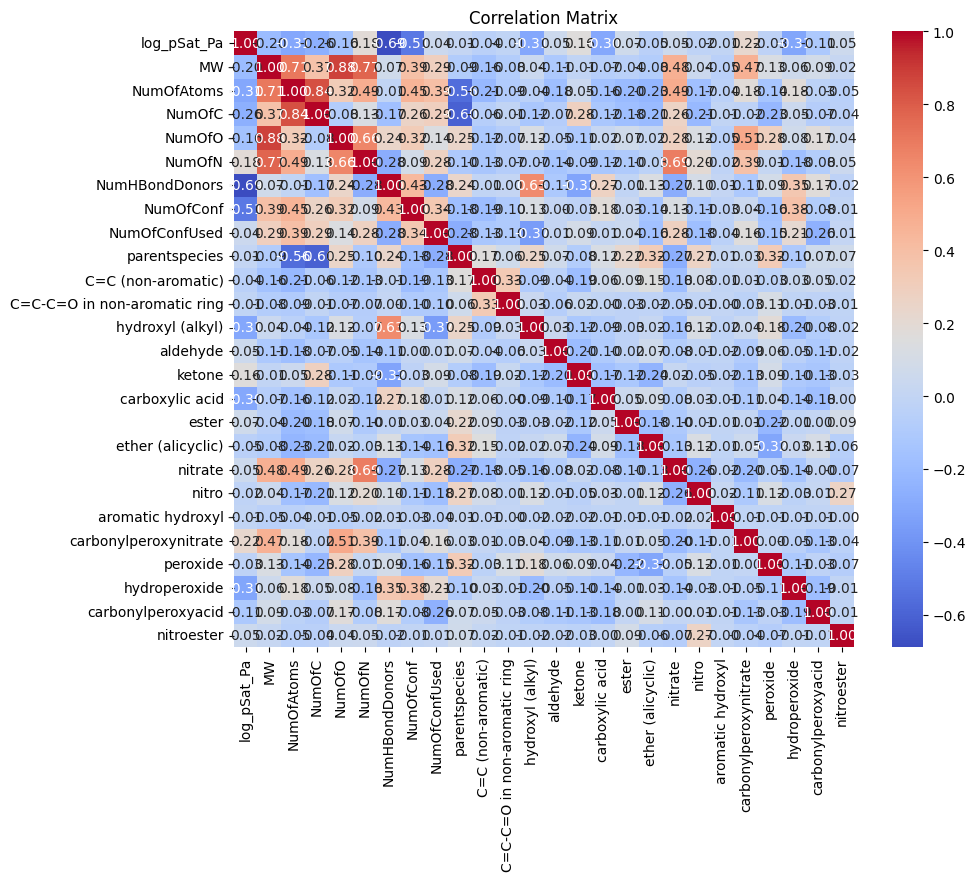

In [4]:

def get_correlation_matrix(data):
    corr_matrix = data.corr()

    plt.figure(figsize=(10, 8))  # Adjust figure size for large matrices
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix")
    plt.show()

get_correlation_matrix(data_train)

In [5]:
data_train.describe()

log_pSat_Pa            MW    NumOfAtoms        NumOfC        NumOfO  \
count  26637.000000  26637.000000  26637.000000  26637.000000  26637.000000   
mean      -5.516747    264.638341     26.251567      6.862409      9.937042   
std        3.120191     49.618151      5.229818      1.453679      2.485167   
min      -18.822563     30.010565      4.000000      1.000000      0.000000   
25%       -7.515147    233.017166     23.000000      6.000000      8.000000   
50%       -5.450577    266.986260     26.000000      7.000000     10.000000   
75%       -3.429192    299.012475     30.000000      7.000000     12.000000   
max        8.390642    386.044503     41.000000     10.000000     17.000000   

             NumOfN  NumHBondDonors     NumOfConf  NumOfConfUsed  \
count  26637.000000    26637.000000  26637.000000   26637.000000   
mean       1.063558        2.201637    229.856778      25.700417   
std        0.710745        1.021029    203.234312      14.689993   
min        0.000000        0.000000      1.000000       1.000000   
25%        1.000000        2.000000     72.000000      11.000000   
50%        1.000000        2.000000    173.000000      30.000000   
75%        2.000000        3.000000    332.000000      40.000000   
max        2.000000        6.000000   1743.000000      40.000000   

       parentspecies  ...         ester  ether (alicyclic)       nitrate  \
count   26637.000000  ...  26637.000000       26637.000000  26637.000000   
mean        4.438450  ...      0.156587           0.205917      0.667680   
std         2.509169  ...      0.440561           0.404377      0.674062   
min         0.000000  ...      0.000000           0.000000      0.000000   
25%         4.000000  ...      0.000000           0.000000      0.000000   
50%         6.000000  ...      0.000000           0.000000      1.000000   
75%         6.000000  ...      0.000000           0.000000      1.000000   
max         7.000000  ...      2.000000           1.000000      2.000000   

              nitro  aromatic hydroxyl  carbonylperoxynitrate      peroxide  \
count  26637.000000       26637.000000           26637.000000  26637.000000   
mean       0.154034           0.001089               0.241844      0.281188   
std        0.366561           0.046247               0.452091      0.449587   
min        0.000000           0.000000               0.000000      0.000000   
25%        0.000000           0.000000               0.000000      0.000000   
50%        0.000000           0.000000               0.000000      0.000000   
75%        0.000000           0.000000               0.000000      1.000000   
max        2.000000           3.000000               2.000000      1.000000   

       hydroperoxide  carbonylperoxyacid    nitroester  
count   26637.000000        26637.000000  26637.000000  
mean        0.769982            0.261065      0.013065  
std         0.696776            0.469067      0.115194  
min         0.000000            0.000000      0.000000  
25%         0.000000            0.000000      0.000000  
50%         1.000000            0.000000      0.000000  
75%         1.000000            0.000000      0.000000  
max         4.000000            3.000000      2.000000  

[8 rows x 26 columns]

In [6]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_train), columns=data_train.columns)
X = data_scaled.drop(['log_pSat_Pa'], axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

high_vif_features = vif_data[vif_data["VIF"] > 10]


/home/ncnella/myenv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [7]:
#box plot

def show_box_plot(data):
    fig, ax = plt.subplots(5, 6, figsize=(60,20))
    row = 1
    for idx, column_name in enumerate(data.columns):
        row = idx // 6  
        col = idx % 6 
        ax[row, col].boxplot(data_train[column_name])
        ax[row, col].set_title(column_name)
    plt.show()

show_box_plot(data_train)

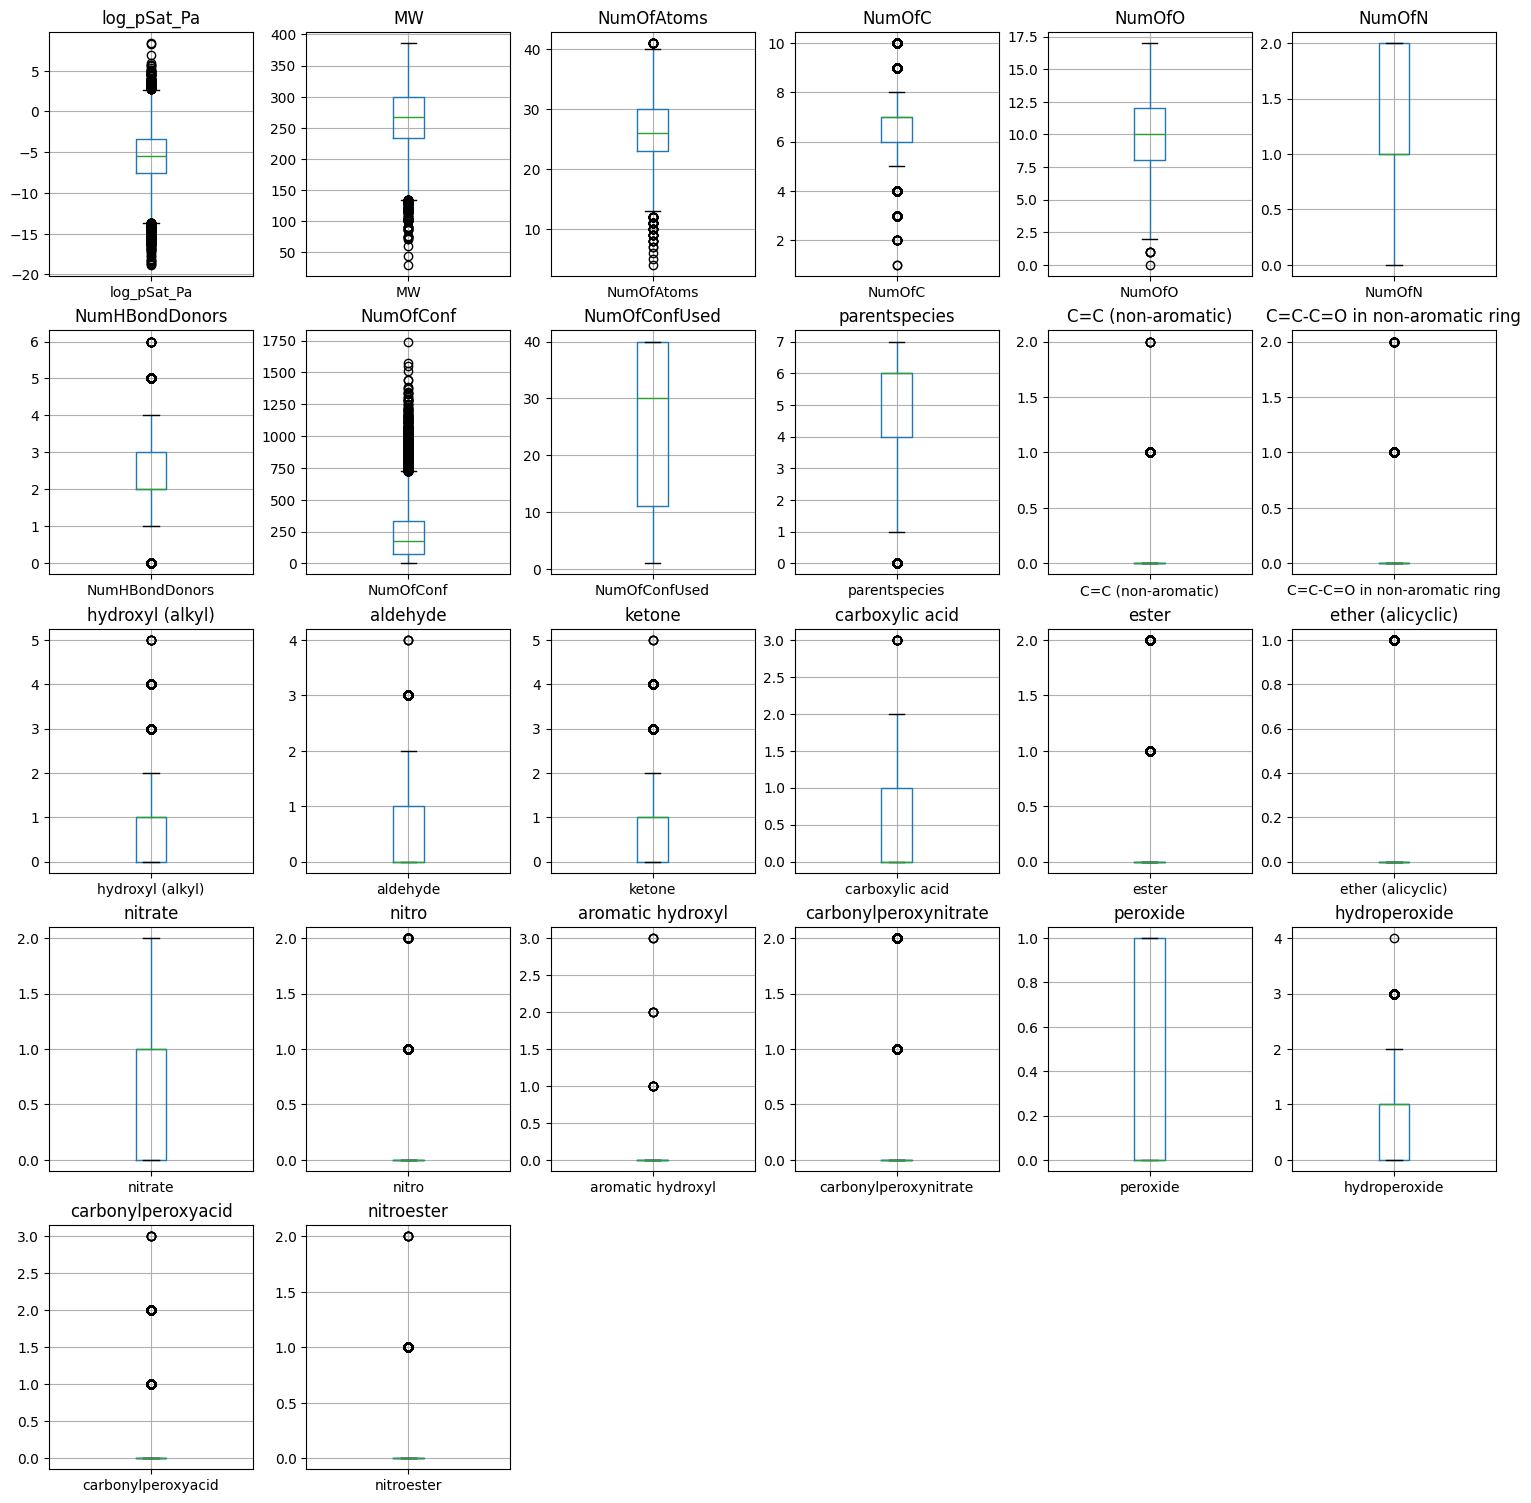

In [19]:
def show_grouped_box_plot(data):
    # Get the features to plot (excluding the grouping column)
    feature_columns = data.columns
    
    # Define grid dimensions based on the number of features
    num_features = len(feature_columns)
    rows = (num_features // 6) + 1  # 6 plots per row
    cols = min(num_features, 6)     # At most 6 columns per row

    fig, ax = plt.subplots(rows, cols, figsize=(15, 3 * rows), constrained_layout=True)
    ax = ax.flatten()  # Flatten the axes array for easy indexing

    for idx, column_name in enumerate(feature_columns):
        data.boxplot(column=column_name, ax=ax[idx])
        ax[idx].set_title(f'{column_name}')

    for i in range(idx + 1, len(ax)):
        ax[i].set_visible(False)

    plt.suptitle("") 
    plt.show()

show_grouped_box_plot(data_train)

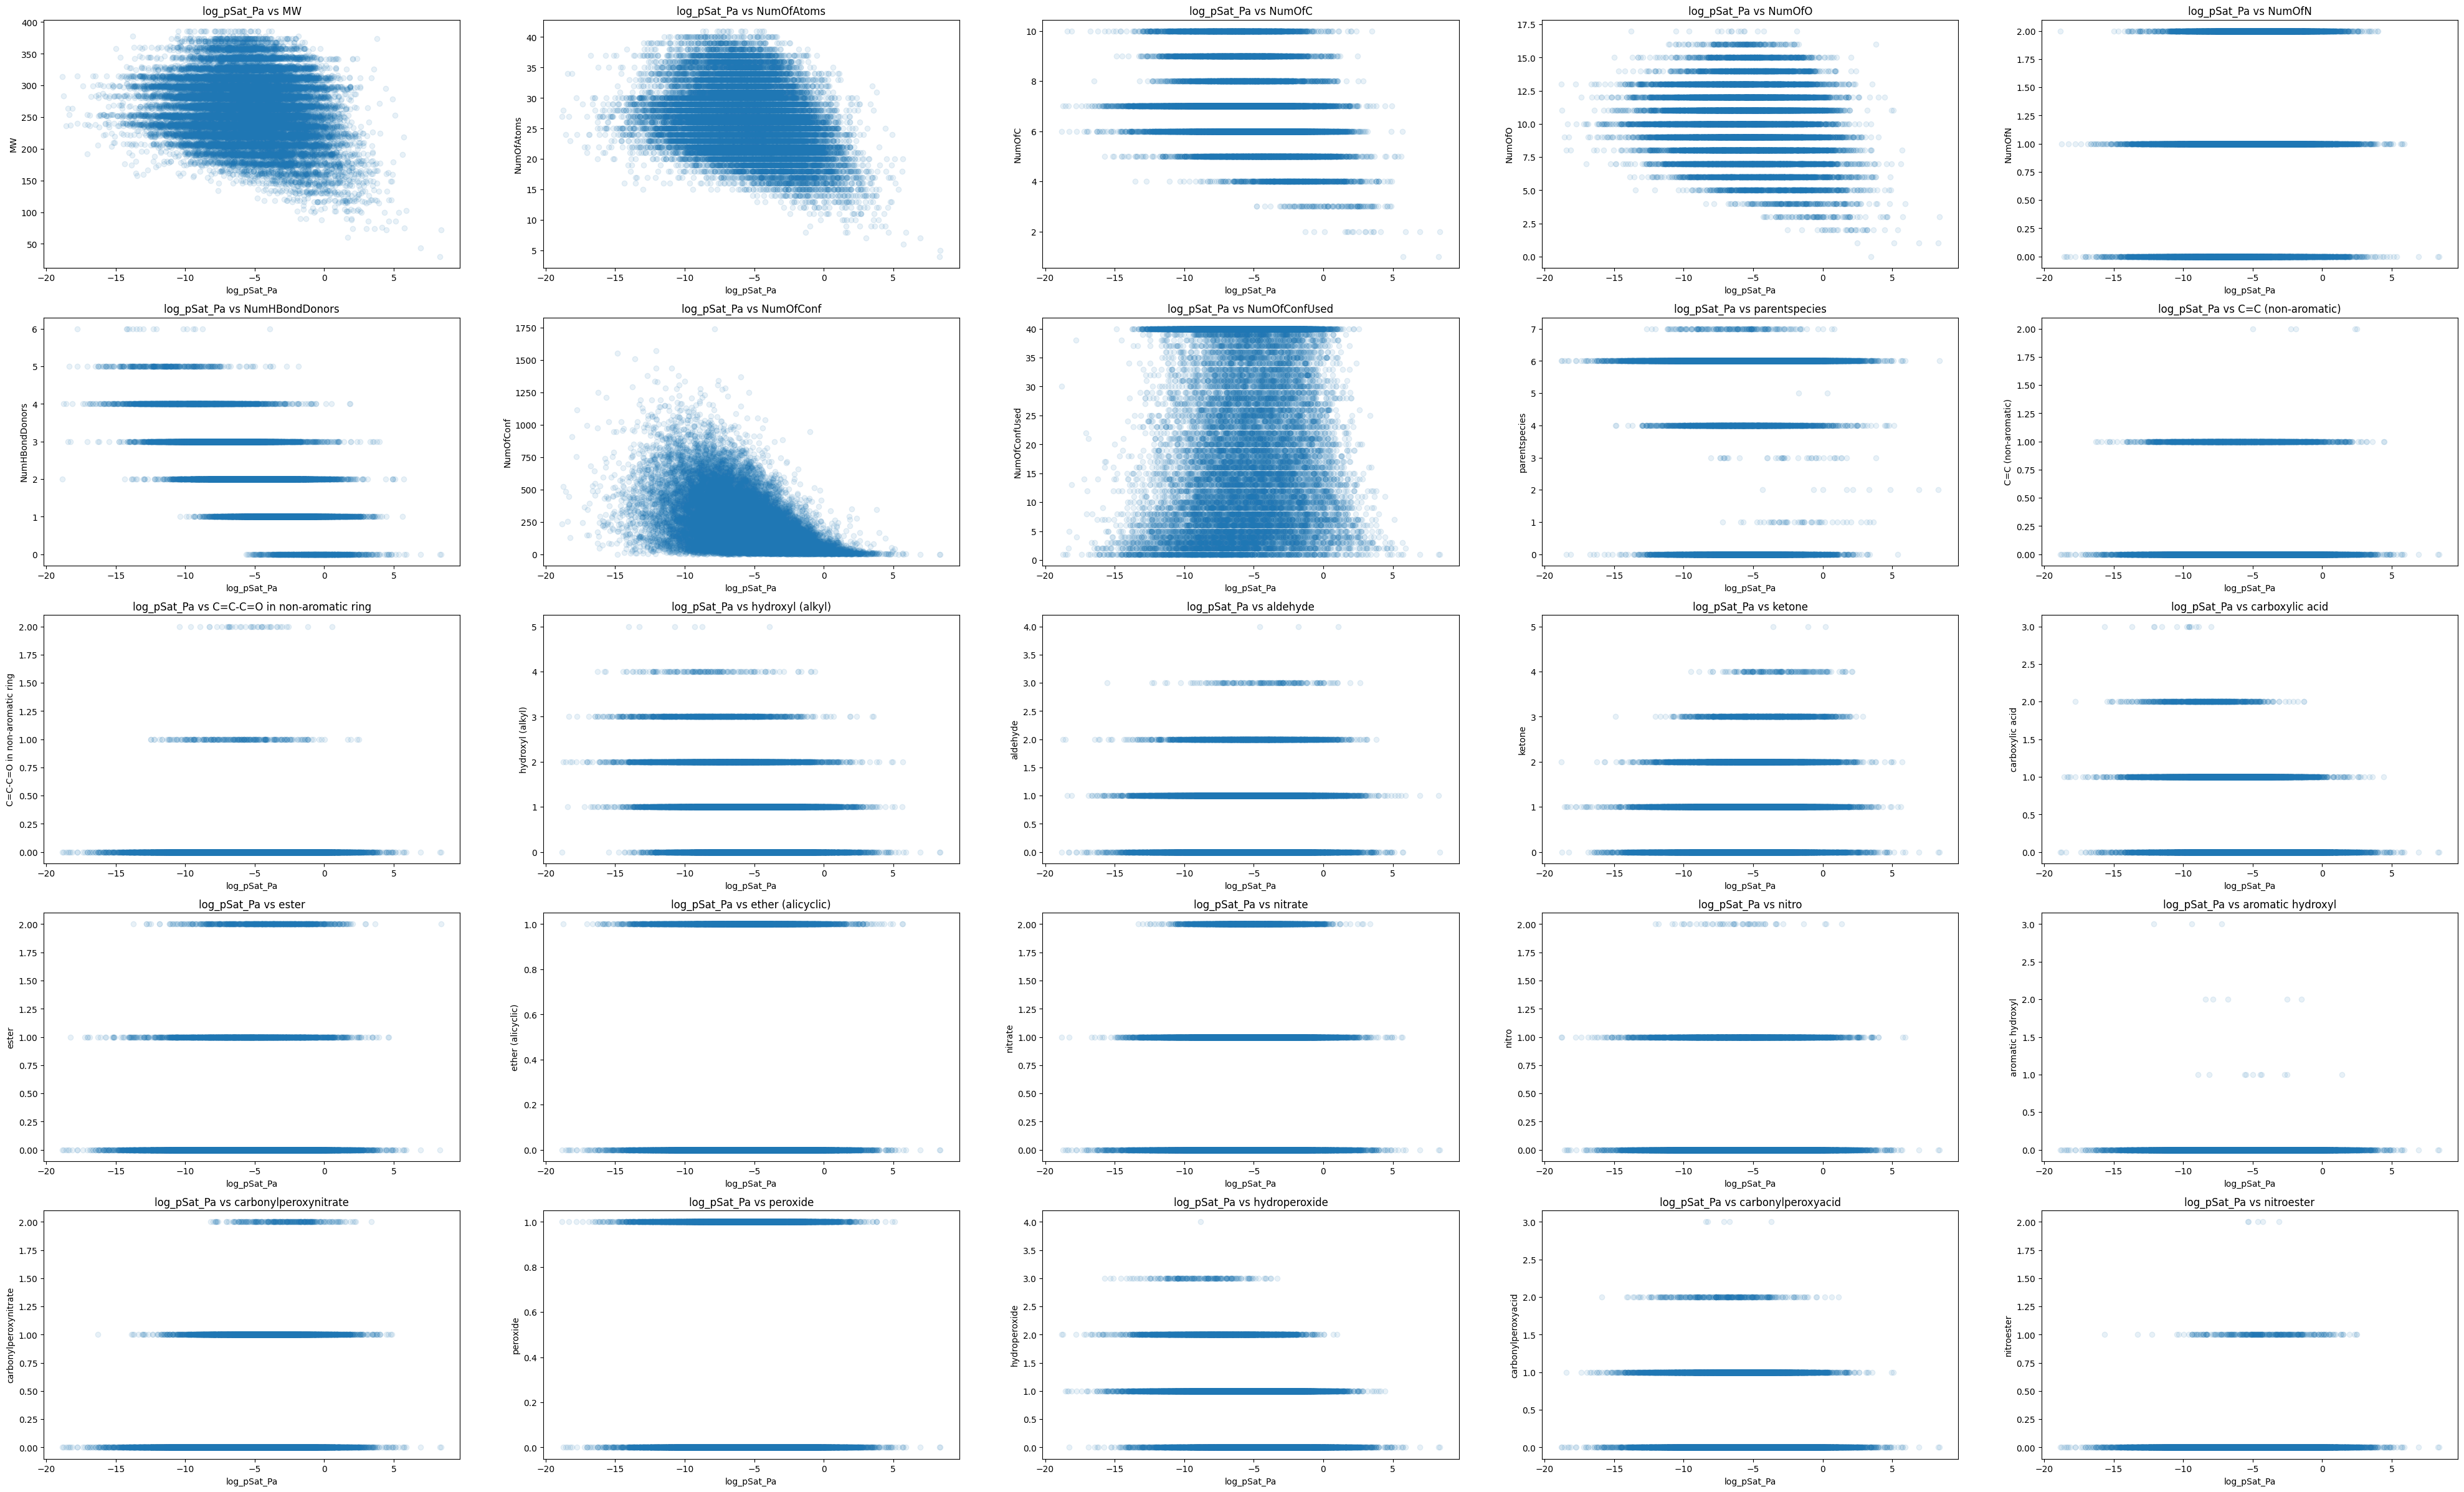

In [9]:
# scatterplot

def show_scatter_plot(data):
    fig, ax = plt.subplots(5, 5, figsize=(50, 30))
    row = 1
    for idx, column_name in enumerate(data.columns[1:]):
        row = idx // 5  
        col = idx % 5 
        ax[row, col].scatter(x=data['log_pSat_Pa'], y=data[column_name], alpha=0.1)
        ax[row, col].set_title(f"log_pSat_Pa vs {column_name}")
        ax[row, col].set_xlabel('log_pSat_Pa')
        ax[row, col].set_ylabel(f'{column_name}')
    plt.show()

show_scatter_plot(data_train)

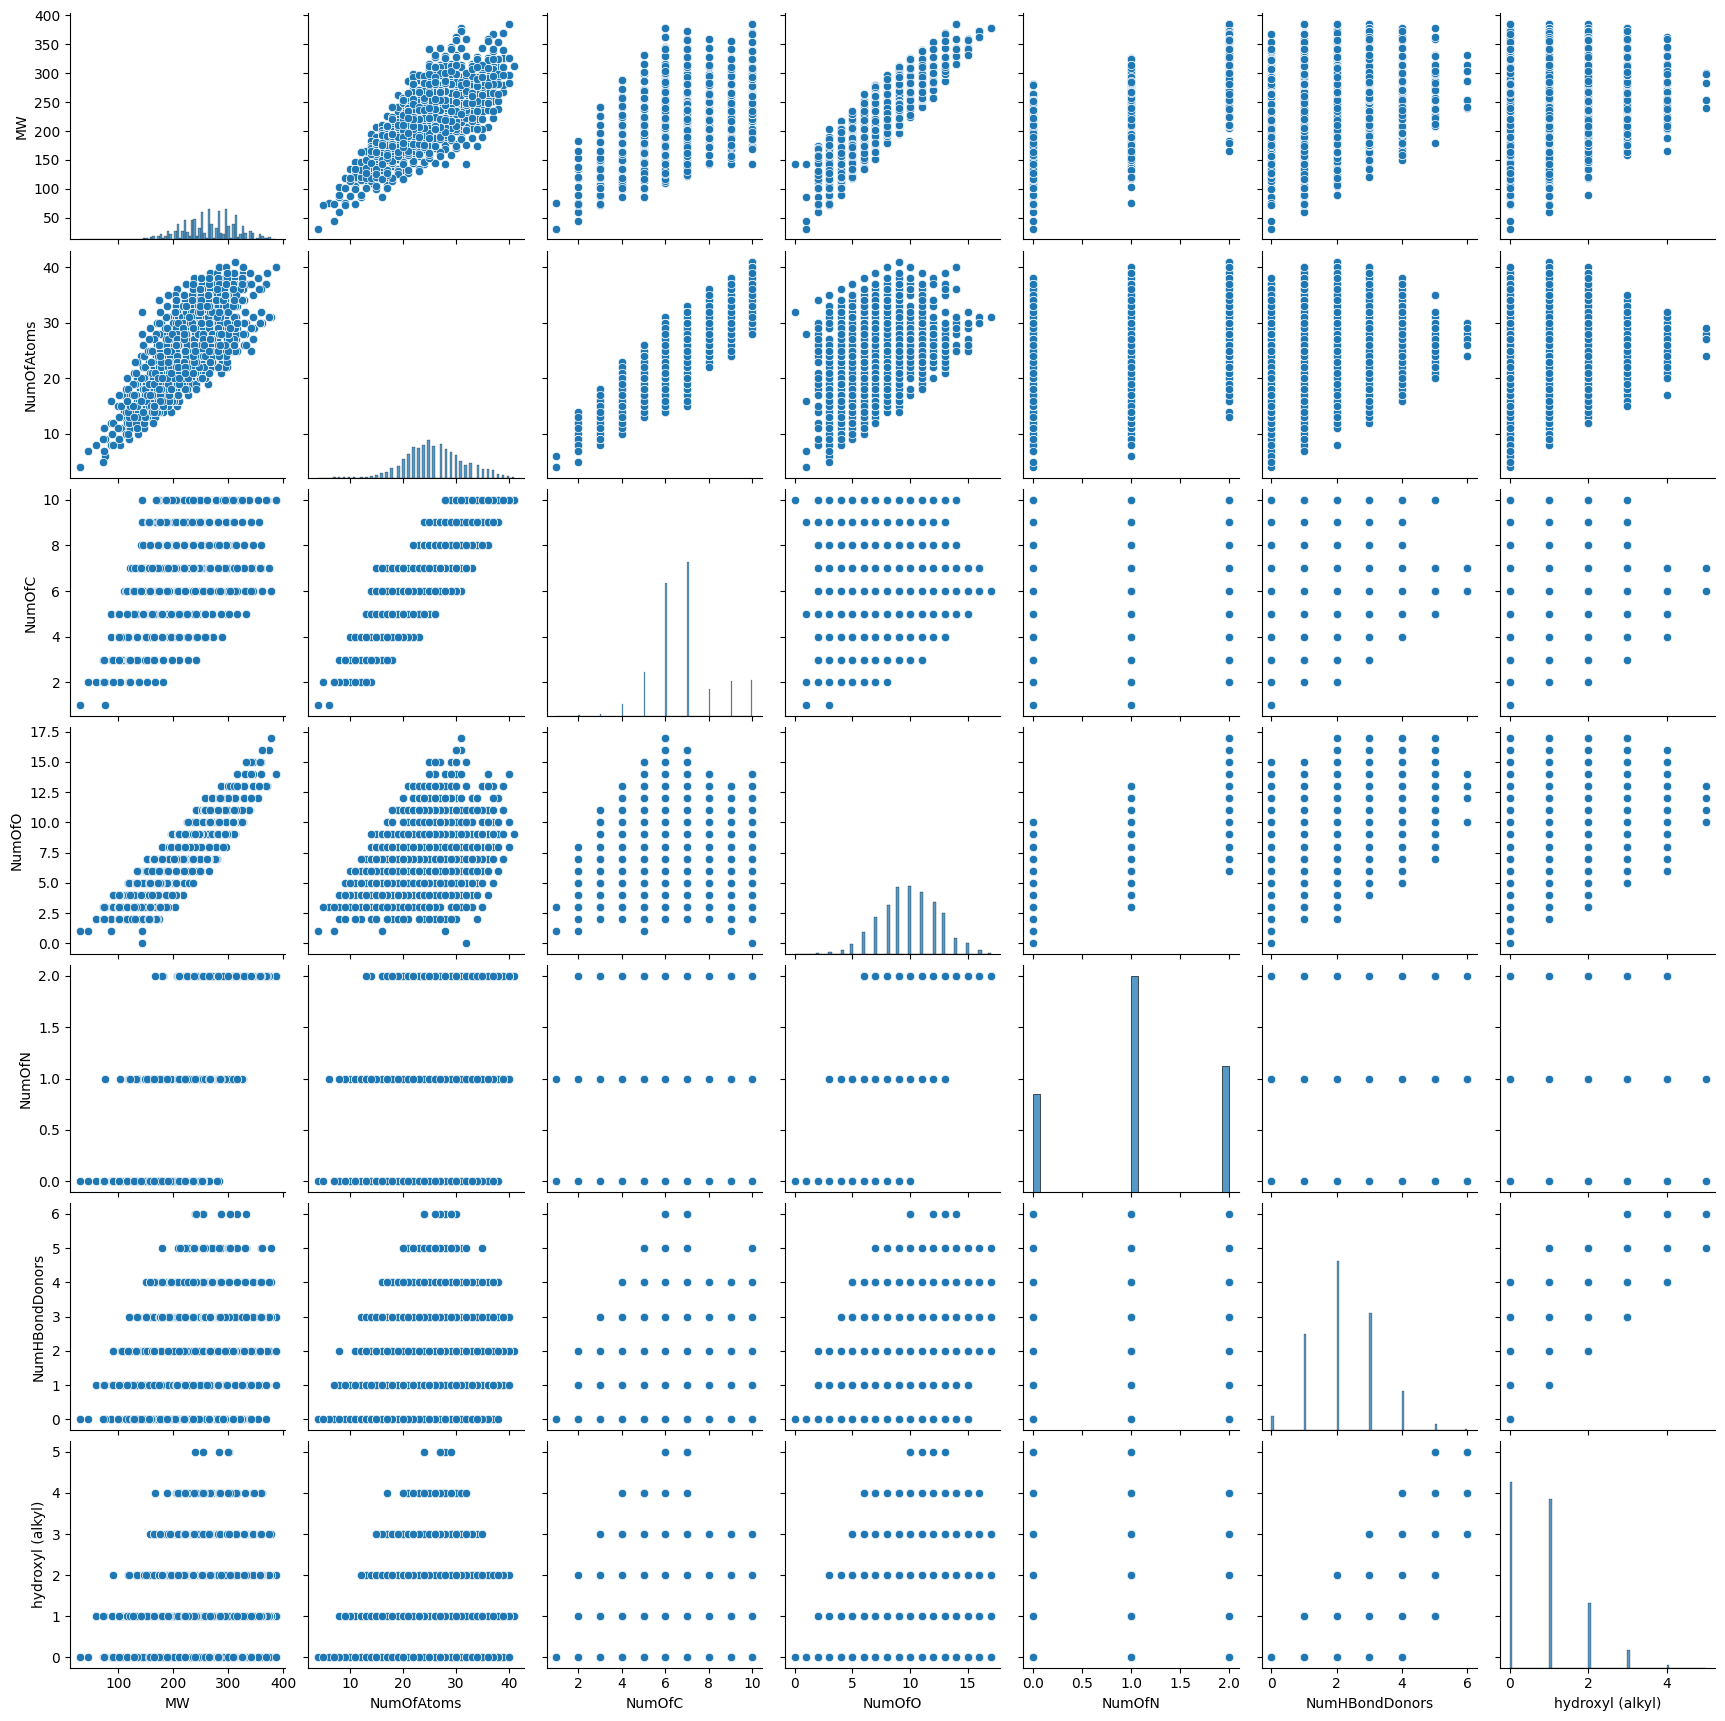

In [10]:
high_vif_df = data_train.loc[:, high_vif_features['Feature'][0:7]]

sns.pairplot(high_vif_df)
plt.show()

In [11]:
data_3 = data_train[data_train['NumOfConf'] < 700]

corr_matrix_explained_1 = data_train.corr()['log_pSat_Pa']

corr_matrix_explained_2 = data_3.corr()['log_pSat_Pa']
print(corr_matrix_explained_1)
print(corr_matrix_explained_2)


log_pSat_Pa                     1.000000
MW                             -0.199574
NumOfAtoms                     -0.307337
NumOfC                         -0.262769
NumOfO                         -0.155064
NumOfN                          0.183152
NumHBondDonors                 -0.689196
NumOfConf                      -0.513653
NumOfConfUsed                   0.043343
parentspecies                   0.006769
C=C (non-aromatic)             -0.042623
C=C-C=O in non-aromatic ring   -0.014226
hydroxyl (alkyl)               -0.310452
aldehyde                        0.051602
ketone                          0.164555
carboxylic acid                -0.304259
ester                           0.069376
ether (alicyclic)              -0.045129
nitrate                         0.052007
nitro                          -0.016457
aromatic hydroxyl              -0.006791
carbonylperoxynitrate           0.223739
peroxide                       -0.026531
hydroperoxide                  -0.314053
carbonylperoxyac

## Log transformation data analysis

In [12]:
train_log = data_train.copy()

for column in train_log.columns:
    if column != 'log_pSat_Pa':
        try:
            train_log[column] = np.log10(train_log[column])
        except (ValueError, AttributeError):
            pass



/home/ncnella/myenv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
get_correlation_matrix(train_log)

In [14]:
show_scatter_plot(train_log)